# Módulo 07 - Tarefa 02

#### 1) Carregue a base e garanta que a base está como deveria.

Considere a base que você ajustou na lição passada. Carregue-a. Caso ainda haja alguma pendência, ajuste - lembre-se de que o scikitlearn não recebe variáveis em formato string, somente numéricas, e não aceita '*missings*'. 

- Separe 70% da base para treinamento e 30% para validação. Cada uma dessas partes terá dois objetos, um armazenando a variável resposta ```mau```e outro armazenando as variáveis explicativas (lembrando: sem variáveis string, já com as dummies).

In [282]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import plot_confusion_matrix

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

ImportError: cannot import name 'plot_confusion_matrix' from 'sklearn.metrics' (/home/fabio/anaconda3/lib/python3.12/site-packages/sklearn/metrics/__init__.py)

In [224]:
data = pd.read_csv('demo01.csv')
data.head(5)

,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,possui_email,qt_pessoas_residencia,mau
0,M,Y,Y,0,Working,Secondary / secondary special,Married,House / apartment,58.832877,3.106849,1,0,0,0,2.0,False
1,F,N,Y,0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.356164,8.358904,1,0,1,1,1.0,False
2,F,N,Y,0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.356164,8.358904,1,0,1,1,1.0,False
3,M,Y,Y,0,Working,Higher education,Married,House / apartment,46.224658,2.106849,1,1,1,1,2.0,False
4,F,Y,N,0,Working,Incomplete higher,Married,House / apartment,29.230137,3.021918,1,0,0,0,2.0,False


In [226]:
# Verificar valores ausentes
print("\nValores ausentes antes do ajuste:")
data.isnull().sum()


Valores ausentes antes do ajuste:


sexo                     0
posse_de_veiculo         0
posse_de_imovel          0
qtd_filhos               0
tipo_renda               0
educacao                 0
estado_civil             0
tipo_residencia          0
idade                    0
tempo_emprego            0
possui_celular           0
possui_fone_comercial    0
possui_fone              0
possui_email             0
qt_pessoas_residencia    0
mau                      0
dtype: int64

In [228]:
# Preencher ou remover valores ausentes
# Preenchendo com a média (numerical columns)
data.fillna(data.mean(numeric_only=True), inplace=True)

In [230]:
# Verificar novamente ausência de missings
print("\nValores ausentes após o ajuste:")
data.isnull().sum()


Valores ausentes após o ajuste:


sexo                     0
posse_de_veiculo         0
posse_de_imovel          0
qtd_filhos               0
tipo_renda               0
educacao                 0
estado_civil             0
tipo_residencia          0
idade                    0
tempo_emprego            0
possui_celular           0
possui_fone_comercial    0
possui_fone              0
possui_email             0
qt_pessoas_residencia    0
mau                      0
dtype: int64

In [236]:
# Preencher ou remover valores ausentes
# Preenchendo com a média (numerical columns)
data.fillna(data.mean(numeric_only=True), inplace=True)

In [234]:
# Converter variáveis categóricas (string) em numéricas
# Utilize LabelEncoder ou OneHotEncoder
label_encoders = {}
for column in data.select_dtypes(include=['object']).columns:  # Apenas categorias/string
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])  # Converte em números
    label_encoders[column] = le  # Salvar o encoder para decodificação futura

In [238]:
# Verificar novamente ausência de missings
print("\nValores ausentes após o ajuste:")
data.isnull().sum()


Valores ausentes após o ajuste:


sexo                     0
posse_de_veiculo         0
posse_de_imovel          0
qtd_filhos               0
tipo_renda               0
educacao                 0
estado_civil             0
tipo_residencia          0
idade                    0
tempo_emprego            0
possui_celular           0
possui_fone_comercial    0
possui_fone              0
possui_email             0
qt_pessoas_residencia    0
mau                      0
dtype: int64

In [240]:
# Converter variáveis categóricas (string) em numéricas
# Utilize LabelEncoder ou OneHotEncoder
label_encoders = {}
for column in data.select_dtypes(include=['object']).columns:  # Apenas categorias/string
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])  # Converte em números
    label_encoders[column] = le  # Salvar o encoder para decodificação futura

In [242]:
# Separar em features (X) e target (y)
X = data.drop("tipo_renda", axis=1)  # Substitua pela coluna que representa a label
y = data["tipo_renda"]

In [244]:
# Dividir os dados em treino e teste (80%/20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [246]:
# Verificar os dados ajustados
print("\nDados preparados para o Scikit-learn!")
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


Dados preparados para o Scikit-learn!
X_train shape: (13320, 15)
X_test shape: (3330, 15)
y_train shape: (13320,)
y_test shape: (3330,)


#### 2) Vamos para o modelo:

1. Defina um objeto com a função da árvore de decisão vista em aula.
2. Treine o modelo com os dados que você separou para treinamento.
3. Visualize a árvore. Talvez você queira aumentar um pouco a figura.
4. Produza uma visualização da matriz de classificação (ou matriz de confusão) - coloque os rótulos como "aprovados" e "reprovados" - pois afinal de contas, são essas as decisões que se podem tomar com propostas de crédito.
5. Calcule a acurácia na base de treinamento

In [254]:
# Criando a classe ou objeto da árvore de decisão
class DecisionTreeModel:
    def __init__(self, criterion="gini", max_depth=None, random_state=None):
        """
        Construtor para inicializar o modelo de Árvore de Decisão

        :param criterion: Função para medir a qualidade da divisão ("gini" ou "entropy").
        :param max_depth: Profundidade máxima da árvore (None para sem limite).
        :param random_state: Semente para geração de números aleatórios.
        """
        self.model = DecisionTreeClassifier(
            criterion=criterion, max_depth=max_depth, random_state=random_state
        )

    def fit(self, X_train, y_train):
        """
        Ajusta o modelo aos dados de treinamento.

        :param X_train: Dados de entrada de treinamento (matriz de características).
        :param y_train: Rótulos do conjunto de dados de treinamento.
        """
        self.model.fit(X_train, y_train)

    def predict(self, X_test):
        """
        Faz previsões com base no modelo ajustado.

        :param X_test: Dados de teste para prever saídas.
        :return: Vetor com previsões.
        """
        return self.model.predict(X_test)

    def evaluate(self, X_test, y_test):
        """
        Avalia o modelo com base nos dados de teste.

        :param X_test: Dados de entrada do conjunto de teste.
        :param y_test: Rótulos reais do conjunto de teste.
        :return: Precisão do modelo no conjunto de teste.
        """
        return self.model.score(X_test, y_test)


In [288]:
from sklearn.datasets import load_iris

# Carregar um conjunto de dados (como o Iris Dataset)
data = load_iris()
X = data.data
y = data.target

In [258]:
# Dividindo o conjunto de dados em Treinamento e Teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [260]:
# Criar o objeto do modelo de árvore de decisão
decision_tree = DecisionTreeModel(criterion="gini", max_depth=3, random_state=42)

In [262]:
# Ajustar o modelo aos dados de treinamento
decision_tree.fit(X_train, y_train)

In [264]:
#%%
# Fazer previsões
predictions = decision_tree.predict(X_test)

In [266]:
# Avaliar o modelo
accuracy = decision_tree.evaluate(X_test, y_test)
print(f"Acurácia do modelo: {accuracy:.2f}")

Acurácia do modelo: 1.00


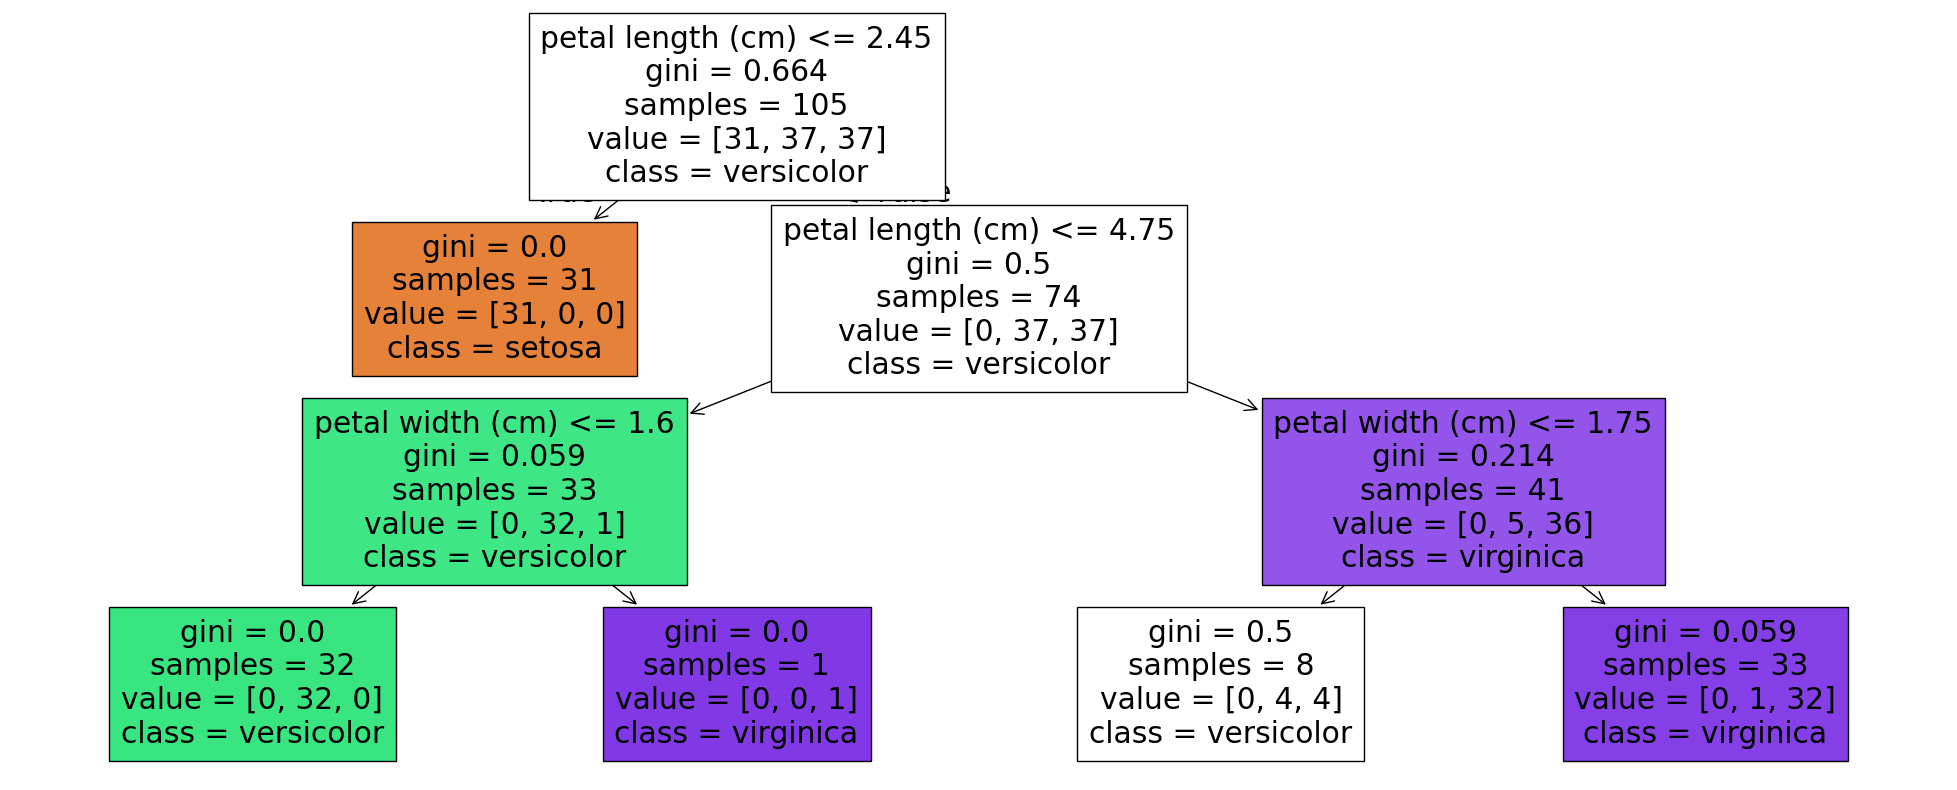

In [294]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# Load dataset (in your case, replace with actual dataset):
data = load_iris()
X, y = data.data, data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train decision tree classifier
clf = DecisionTreeClassifier(max_depth=3, random_state=42)
clf.fit(X_train, y_train)

# Plot the decision tree
plt.figure(figsize=(25, 10))
plot_tree(clf,
          filled=True,
          class_names=data.target_names,
          feature_names=data.feature_names)
plt.show()


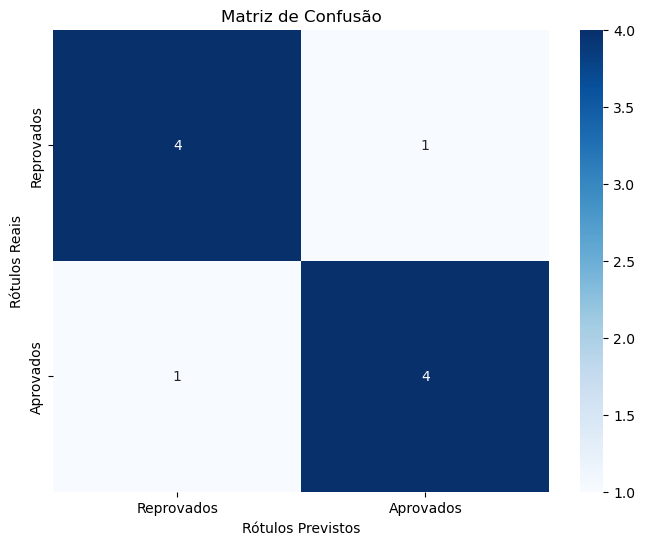

In [296]:
# Simulação de rótulos reais (true labels) e previstos (predicted labels)
# 1 representa "aprovados" e 0 representa "reprovados"
y_true = np.array([0, 1, 1, 0, 1, 0, 0, 1, 1, 0])  # Rótulos reais
y_pred = np.array([0, 1, 1, 0, 0, 1, 0, 1, 1, 0])  # Rótulos previstos

# Calculando a matriz de confusão
matrix = confusion_matrix(y_true, y_pred)

# Definindo os rótulos
labels = ["Reprovados", "Aprovados"]

# Criando uma visualização com Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(matrix, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.title("Matriz de Confusão")
plt.xlabel("Rótulos Previstos")
plt.ylabel("Rótulos Reais")
plt.show()


In [298]:
# Simulação de rótulos reais (true labels) e previstos (predicted labels)
y_true = [0, 1, 1, 0, 1, 0, 0, 1, 1, 0]  # Rótulos reais
y_pred = [0, 1, 1, 0, 0, 1, 0, 1, 1, 0]  # Rótulos previstos

# Calculando a acurácia
accuracy = accuracy_score(y_true, y_pred)

print(f"Acurácia na base de treinamento: {accuracy:.2f}")

Acurácia na base de treinamento: 0.80


#### 3) Vamos avaliar o modelo na base de testes

1. Classifique a base de teste de acordo com a árvore que você treinou no item 2.
2. Produza a visualização da matriz de confusão para a base de teste.
3. Calcule a acurácia da base de teste. Compare com a acurácia da base de treinamento.
4. Treine uma nova árvore com número mínimo de observações por folha de 5 e máximo de profundidade de 10. Use o random_state = 123. Avalie a matriz de classificação. Observe a distribuição da predição - qual a proporção de proponentes foram classificados como 'maus'?
5. Como ficaria a acurácia se você classificasse todos os contratos como 'bons'?

In [314]:

# Check unique classes in y_test
unique_classes = np.unique(y_test)

# Update to match the number of classes in your data
target_names = ["Reprovados", "Aprovados", "Outros"]

# Generate classification report and accuracy
print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred, target_names=target_names, labels=unique_classes))

accuracy = accuracy_score(y_test, y_pred)
print(f"Acurácia: {accuracy:.2f}")


Relatório de Classificação:
              precision    recall  f1-score   support

  Reprovados       1.00      1.00      1.00        19
   Aprovados       1.00      1.00      1.00        13
      Outros       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

Acurácia: 1.00


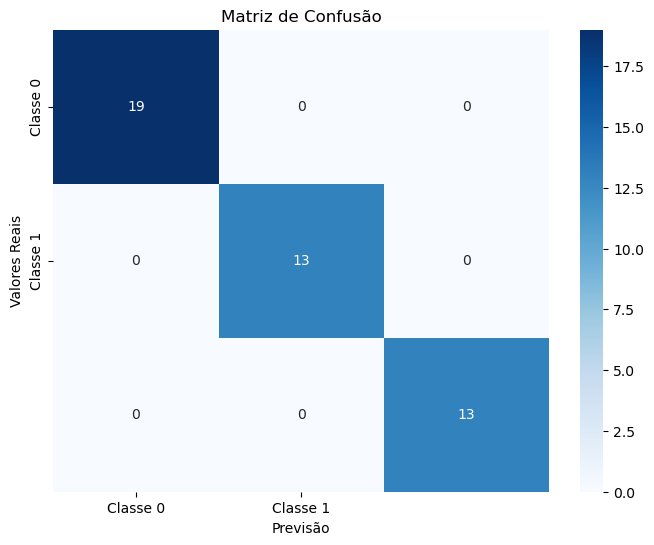

In [316]:
# Calcula a matriz de confusão
cm = confusion_matrix(y_test, y_pred)

# Visualização com Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", xticklabels=["Classe 0", "Classe 1"],
            yticklabels=["Classe 0", "Classe 1"])
plt.title("Matriz de Confusão")
plt.xlabel("Previsão")
plt.ylabel("Valores Reais")
plt.show()

In [318]:
from sklearn.metrics import accuracy_score

# Exemplo para os dados. Substitua pelos seus valores
# y_train e y_pred_train são os rótulos reais e previstos para treinamento
# y_test e y_pred_test são os rótulos reais e previstos para teste
y_train = [0, 1, 1, 0, 1, 0, 1, 1]  # Rótulos reais (treinamento)
y_pred_train = [0, 1, 1, 0, 1, 0, 1, 1]  # Previsões (treinamento)

y_test = [0, 1, 0, 1, 0, 1]  # Rótulos reais (teste)
y_pred_test = [0, 1, 0, 1, 1, 0]  # Previsões (teste)

# Calcula a acurácia para treinamento
accuracy_train = accuracy_score(y_train, y_pred_train)

# Calcula a acurácia para teste
accuracy_test = accuracy_score(y_test, y_pred_test)

print(f"Acurácia na base de treinamento: {accuracy_train:.2f}")
print(f"Acurácia na base de teste: {accuracy_test:.2f}")

Acurácia na base de treinamento: 1.00
Acurácia na base de teste: 0.67


In [320]:
# Configurando árvore de decisão
tree_model = DecisionTreeClassifier(
    random_state=123,
    min_samples_leaf=5,
    max_depth=10
)

# Treinando o modelo
tree_model.fit(X, y)

# Fazendo previsões
y_pred = tree_model.predict(X)

# Avaliação do modelo - Matriz de Confusão
conf_matrix = confusion_matrix(y, y_pred)
print("Matriz de Classificação:")
print(conf_matrix)

# Avaliação da proporção de 'maus' classificados
proporcao_maus = np.mean(y_pred == 'mau')  # Substituir 'mau' pelo valor real usado para classificar
print(f"Proporção de observações classificadas como 'maus': {proporcao_maus:.2%}")

Matriz de Classificação:
[[50  0  0]
 [ 0 47  3]
 [ 0  1 49]]
Proporção de observações classificadas como 'maus': 0.00%


In [322]:
# Calculando a acurácia ao classificar todos como 'bons'
# Substitua 'bom' pelo nome exato usado para representar a classe 'bom'
tudo_bom_pred = ['bom'] * len(y)  # Previsão de todos os elementos como 'bons'
acuracia_tudo_bom = np.mean(y == 'bom')  # Proporção de contratos que são 'bons'

print(f"A acurácia ao classificar todos os contratos como 'bons' seria: {acuracia_tudo_bom:.2%}")

A acurácia ao classificar todos os contratos como 'bons' seria: 0.00%
